In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier

In [33]:
data = pd.read_csv("./통신고객이탈.csv", engine="python")
data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [34]:
data.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [35]:
data.drop("CUSTOMER_ID",axis=1,inplace=True)

In [36]:
data.CHURN.value_counts()

Active     750
Churned    180
Name: CHURN, dtype: int64

In [37]:
data.CHURN = data.CHURN.map(lambda x : 0 if x == 'Active' else 1)
data.CHURN.value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [38]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

df_y = data_dummy.CHURN
df_x = data_dummy.drop("CHURN",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (651, 33)
train data Y size: (651,)
test data X size: (279, 33)
test data Y size: (279,)


In [40]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 0.988
Accucary on test set: 0.867


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1]:
df_train_x_scaled = scale(df_train_x,axis=0)
df_test_x_scaled = scale(df_test_x,axis=0)
pd.DataFrame(df_train_x_scaled,columns=df_train_x.columns).head()

NameError: name 'scale' is not defined

In [42]:
rf_scaled = RandomForestClassifier(random_state=1234)
rf_scaled.fit(df_train_x_scaled,df_train_y)

print("Accucary on training set: {:.3f}".format(rf_scaled.score(df_train_x_scaled,df_train_y)))
print("Accucary on test set: {:.3f}".format(rf_scaled.score(df_test_x_scaled,df_test_y)))

Accucary on training set: 0.988
Accucary on test set: 0.878


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
n_iter_tree = 30
train_accuracy = []
test_accuracy = []

for n_tree in range(n_iter_tree):
    rf1 = RandomForestClassifier(n_estimators=n_tree+1,random_state=1234)
    rf1.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf1.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf1.score(df_test_x_scaled,df_test_y))
    
df_accruacy1 = pd.DataFrame()
df_accruacy1["NumberOfTree"] = [n_tree +1 for n_tree in range(n_iter_tree)]
df_accruacy1["TrainAccuracy"] = train_accuracy
df_accruacy1["TestAccuracy"] = test_accuracy

In [13]:
df_accruacy1

,NumberOfTree,TrainAccuracy,TestAccuracy
0,1,0.970430,0.926573
1,2,0.968510,0.937063
2,3,0.988479,0.941434
3,4,0.981183,0.942308
4,5,0.991167,0.942308
5,6,0.986175,0.944056
6,7,0.992704,0.947552
7,8,0.989247,0.944930
8,9,0.995008,0.944056
9,10,0.991935,0.945804


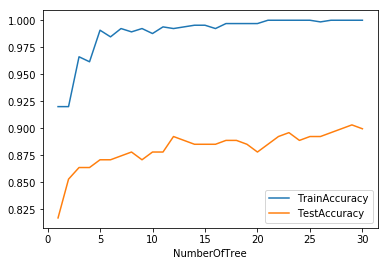

In [45]:
df_accruacy1.set_index("NumberOfTree", inplace=False).plot.line()

In [46]:
para_criterion = ['gini','entropy']
train_accuracy = []
test_accuracy = []

for criterion in para_criterion:
    rf2 = RandomForestClassifier(criterion=criterion,random_state=1234)
    rf2.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf2.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf2.score(df_test_x_scaled,df_test_y))
    
df_accruacy2 = pd.DataFrame()
df_accruacy2["Criterion"] = para_criterion
df_accruacy2["TrainAccuracy"] = train_accuracy
df_accruacy2["TestAccuracy"] = test_accuracy
df_accruacy2

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.987711,0.878136
1,entropy,0.993856,0.867384


In [47]:
para_max_depth = [i+1 for i in range(10)] * 2
n_iter_depth = 10
para_criterion = ['gini']*n_iter_depth + ['entropy']*n_iter_depth
train_accuracy = []
test_accuracy = []

for criterion,depth in zip(para_criterion,para_max_depth):
    rf3 = RandomForestClassifier(criterion=criterion,max_depth=depth,random_state=1234)
    rf3.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf3.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf3.score(df_test_x_scaled,df_test_y))
    
df_accruacy3 = pd.DataFrame()
df_accruacy3["Criterion"] = para_criterion
df_accruacy3["Depth"] = para_max_depth
df_accruacy3["TrainAccuracy"] = train_accuracy
df_accruacy3["TestAccuracy"] = test_accuracy
df_accruacy3

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.791091,0.842294
1,gini,2,0.838710,0.860215
2,gini,3,0.844854,0.860215
3,gini,4,0.872504,0.845878
4,gini,5,0.878648,0.870968
5,gini,6,0.929339,0.878136
6,gini,7,0.915515,0.870968
7,gini,8,0.929339,0.874552
8,gini,9,0.935484,0.870968
9,gini,10,0.956989,0.863799


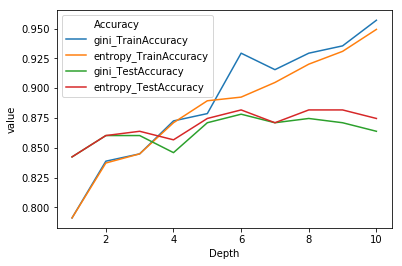

In [48]:
import seaborn as sns
df_accruacy3_melt = pd.melt(df_accruacy3, id_vars=["Criterion","Depth"])
df_accruacy3_melt["Accuracy"] = df_accruacy3_melt["Criterion"] + "_" + df_accruacy3_melt["variable"]
sns.lineplot(x="Depth", y="value", hue="Accuracy", data=df_accruacy3_melt)

In [49]:
train_accuracy = []
test_accuracy = []

n_depth = 4
n_iter_min_leaf_size = 10

para_criterion = ['gini']*n_iter_min_leaf_size
para_min_leaf_size = [i+1 for i in range(n_iter_min_leaf_size)]

for criterion,leafsize in zip(para_criterion,para_min_leaf_size):
    rf4 = RandomForestClassifier(criterion=criterion,max_depth=n_depth,min_samples_leaf= leafsize,random_state=1234)
    rf4.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf4.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf4.score(df_test_x_scaled,df_test_y))
    
df_accruacy4 = pd.DataFrame()
df_accruacy4["Criterion"] = para_criterion
df_accruacy4["Depth"] = n_depth
df_accruacy4["MinLeafSize"] = para_min_leaf_size
df_accruacy4["TrainAccuracy"] = train_accuracy
df_accruacy4["TestAccuracy"] = test_accuracy
df_accruacy4

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,4,1,0.872504,0.845878
1,gini,4,2,0.861751,0.874552
2,gini,4,3,0.863287,0.878136
3,gini,4,4,0.870968,0.863799
4,gini,4,5,0.864823,0.878136
5,gini,4,6,0.854071,0.867384
6,gini,4,7,0.843318,0.874552
7,gini,4,8,0.843318,0.863799
8,gini,4,9,0.841782,0.860215
9,gini,4,10,0.841782,0.860215


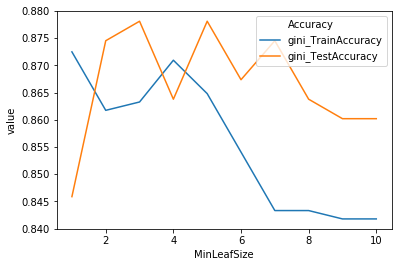

In [50]:
df_accruacy4_melt = pd.melt(df_accruacy4,id_vars=["Criterion","Depth","MinLeafSize"])
df_accruacy4_melt["Accuracy"] = df_accruacy4_melt["Criterion"]+'_'+ df_accruacy4_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=df_accruacy4_melt)

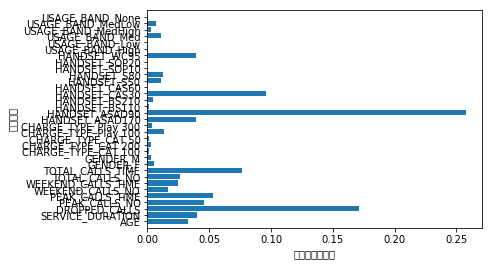

In [51]:
rf_model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_leaf=10, n_estimators=100,random_state=1234)
rf_model.fit(df_train_x_scaled,df_train_y)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = df_train_x.columns
df_feature_importance["importance"] = rf_model.feature_importances_
df_feature_importance.sort_values(by="importance",ascending=False)

import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = df_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),df_train_x.columns)
    plt.xlabel("설명변수중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(rf_model)